NAME :SHRILEKHA UMESH


# TASK #5 TO EXPLORE BUSINESS ANALYTICS USING DATASET

                Perform ‘Exploratory Data Analysis’ on the provided dataset 'SampleSuperstore’

PROBLEM STATEMENT :You are the business owner of the retail firm and want to seehow your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

# IMPORT LIBRARIES

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ DATASET

In [31]:
data = pd.read_csv("SampleSuperstore.csv")

# TO SEE THE FIRST 10 DATA

In [32]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# INFORMATION OF DATA SET

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# DESCRIBE THE DATASET USING .describe

In [34]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# CHECK FOR NULL VALUES

In [35]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [36]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [37]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

# Data visualization

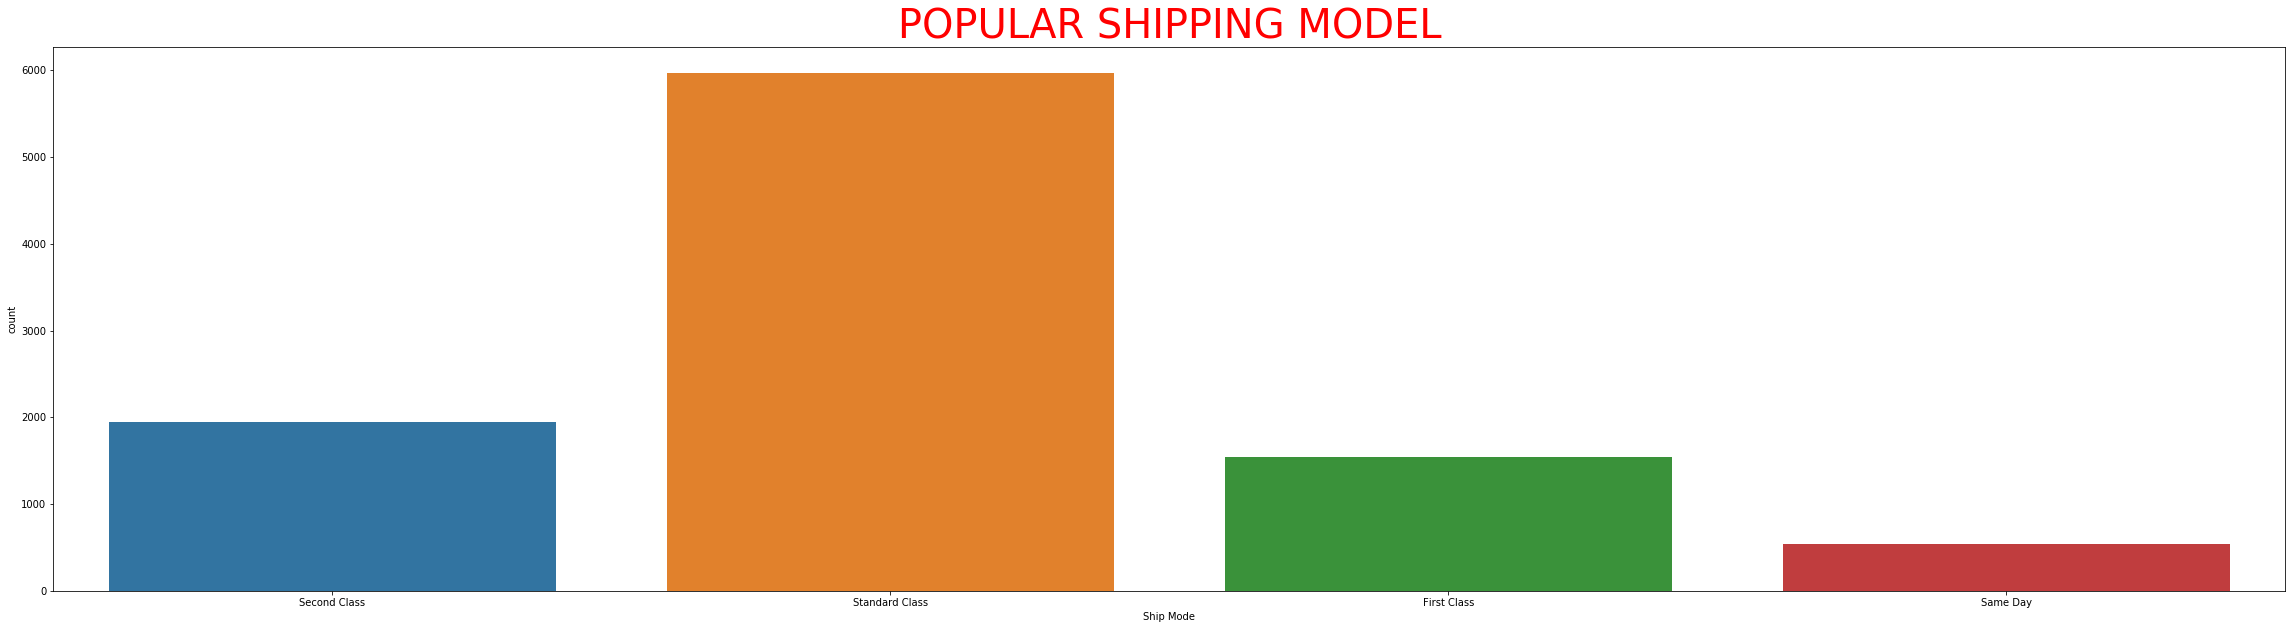

In [38]:
plt.figure(figsize = (40,10))
sns.countplot(data['Ship Mode'])
plt.title("POPULAR SHIPPING MODEL",size = 40,color='Red')
plt.show()

# Checking order quantity

In [39]:
grp = data.groupby('Segment')['Quantity'].sum().reset_index()
grp

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


# To check quantity ordered

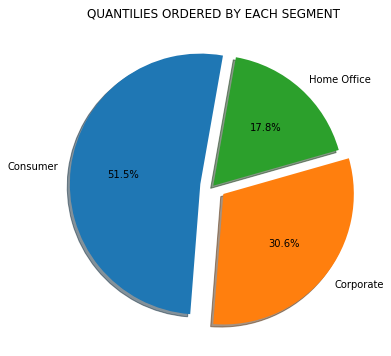

In [40]:
label1 = data['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(grp['Quantity'],autopct='%1.1f%%',labels=label1,explode=(0.1,0.1,0),shadow=True,startangle=80)
plt.title('QUANTILIES ORDERED BY EACH SEGMENT')
plt.show()

# Graphical visualization

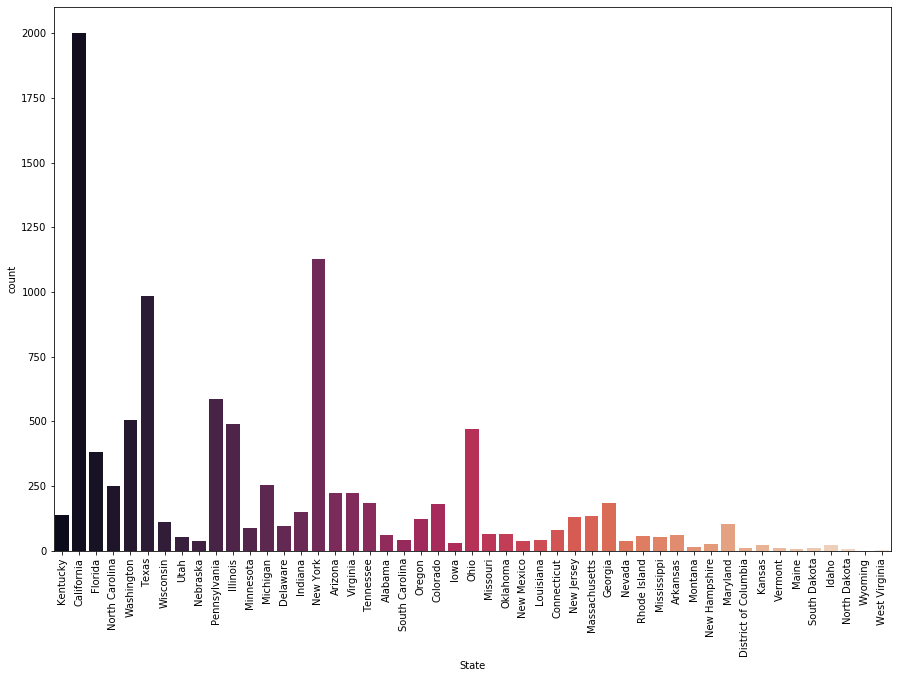

In [41]:
plt.figure(figsize =(15,10))
sns.countplot(data['State'],palette = 'rocket')
plt.xticks(rotation = 90)
plt.show()

# To check top 15 cities by the quantity ordered

In [42]:
top40_city = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
top40_city.head(15)

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
207,Houston,1466
80,Chicago,1132
94,Columbus,836
437,San Diego,670
464,Springfield,649


<Figure size 2880x720 with 0 Axes>

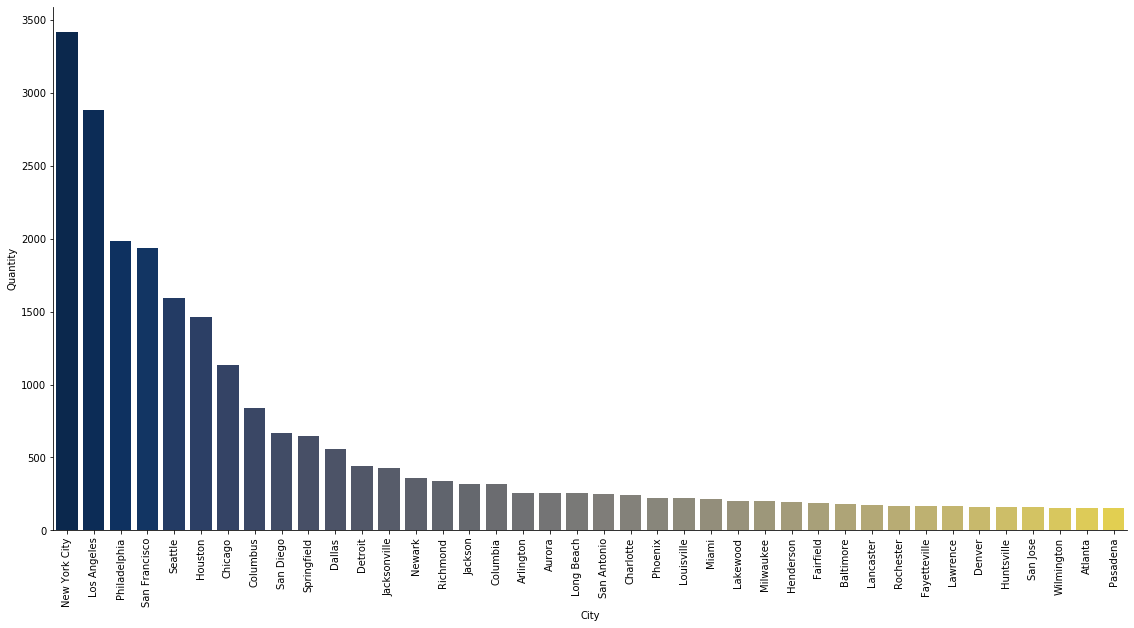

In [43]:
plt.figure(figsize = (40,10))
sns.catplot('City','Quantity',data = top40_city.head(40),kind = 'bar',height=8,aspect=2,palette='cividis')
plt.xticks(rotation=90)
plt.show()

# To check region wise order

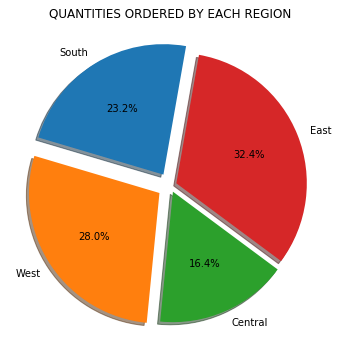

In [44]:
region  = data.groupby('Region')['Quantity'].sum().reset_index()
labels = data['Region'].unique()
plt.figure(figsize=(8,6))
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('QUANTITIES ORDERED BY EACH REGION')
plt.show()

# To check distribution of product

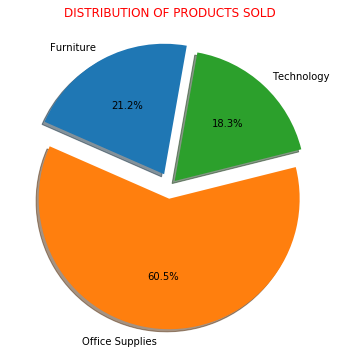

In [45]:
cat = data.groupby('Category')['Quantity'].sum().reset_index()
label = data['Category'].unique()
plt.figure(figsize=(8,6))
plt.pie(cat['Quantity'],autopct='%1.1f%%',labels=label,explode=(0.1,0.1,0.05),shadow=True,startangle=80)
plt.title('DISTRIBUTION OF PRODUCTS SOLD',color='Red')
plt.show()

# Top 15 product sold with thier profit

In [46]:
items = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
items.head(15)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


# To check top 10 profitable products 

Text(0.5, 6.799999999999997, 'PRODUCTS')

<Figure size 2880x720 with 0 Axes>

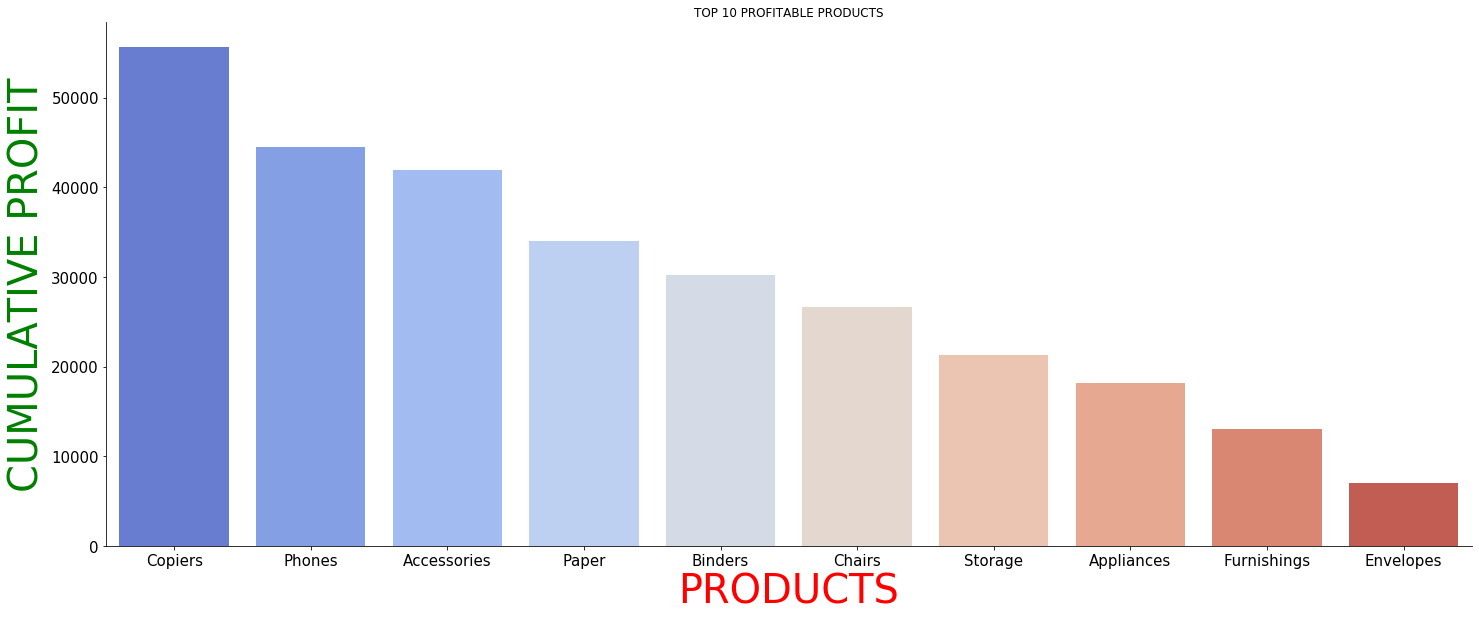

In [47]:
plt.figure(figsize =(40,10))
sns.catplot('Sub-Category','Profit',data=items.head(10),kind='bar',aspect=2.5,height=8,palette='coolwarm')
plt.title('TOP 10 PROFITABLE PRODUCTS')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('CUMULATIVE PROFIT',size=40,color='Green')
plt.xlabel('PRODUCTS',size=40,color='Red')

In [48]:
city = data.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
city.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


# To check top 10 cities with thier profit

Text(0.5, 6.799999999999997, 'CITY NAMES')

<Figure size 2880x720 with 0 Axes>

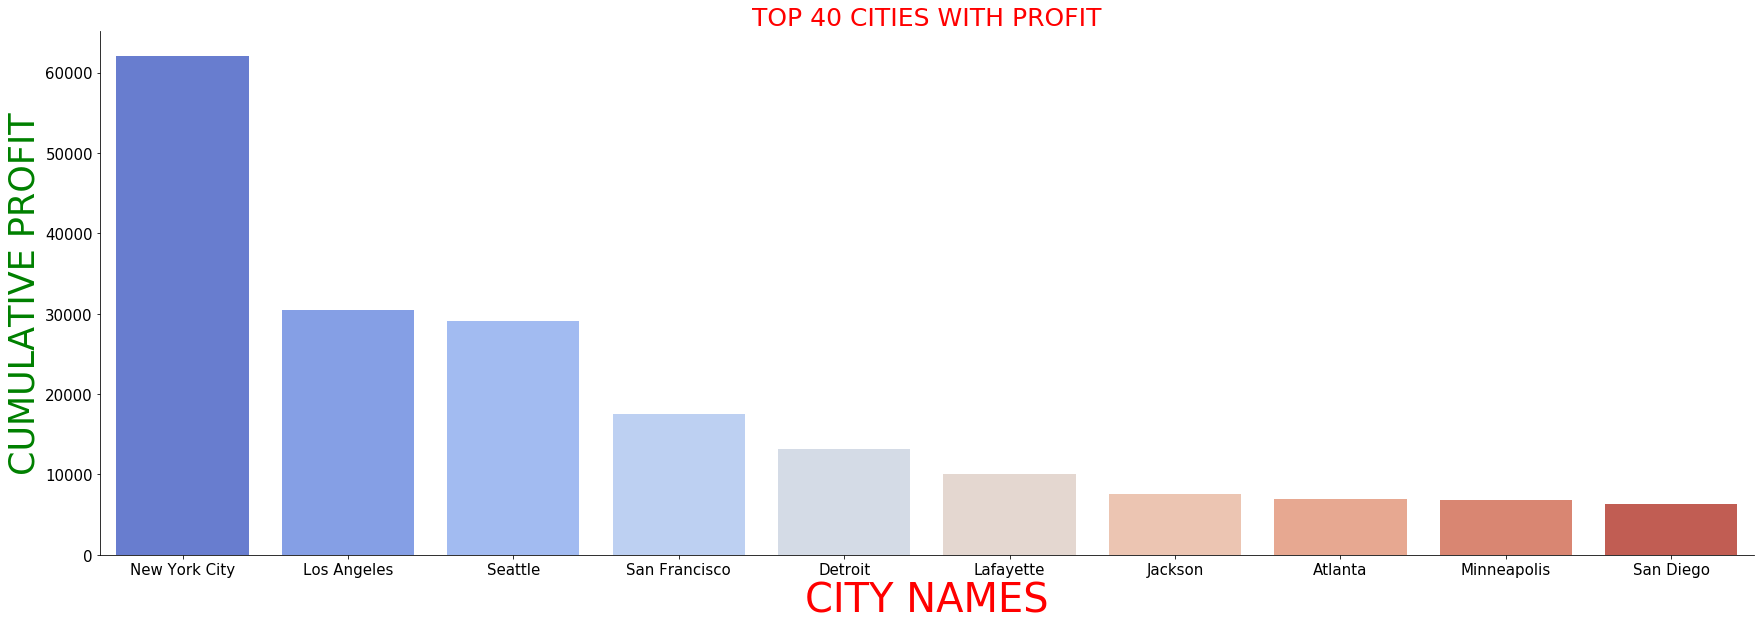

In [49]:
plt.figure(figsize =(40,10))
sns.catplot('City','Profit',data=city.head(10),kind='bar',aspect=3,height=8,palette='coolwarm')
plt.title('TOP 40 CITIES WITH PROFIT',size=25,color = 'Red')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('CUMULATIVE PROFIT',size=35,color='Green')
plt.xlabel('CITY NAMES',size=40,color='Red')